In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.5369 - val_loss: 0.4651
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4262 - val_loss: 0.4045
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3927 - val_loss: 0.3843
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3743 - val_loss: 0.3681
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3599 - val_loss: 0.3558


1. Add one more hidden layer to autoencoder

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.4975 - accuracy: 0.4607 - val_loss: 0.4104 - val_accuracy: 0.4875
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3908 - accuracy: 0.4914 - val_loss: 0.3777 - val_accuracy: 0.4926
Epoch 3/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.3631 - accuracy: 0.4963 - val_loss: 0.3535 - val_accuracy: 0.4956
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3435 - accuracy: 0.4999 - val_loss: 0.3413 - val_accuracy: 0.5008
Epoch 5/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3333 - accuracy: 0.5017 - val_loss: 0.3319 - val_accuracy: 0.4983


2. visualize the input and reconstructed representationof the autoencoder using Matplotlib


In [0]:
prediction = autoencoder1.predict(x_test[[2],:])
#prediction

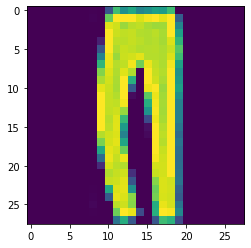

In [10]:
from matplotlib import pyplot as plt
plt.imshow(x_test[2].reshape(28,28))
plt.show()

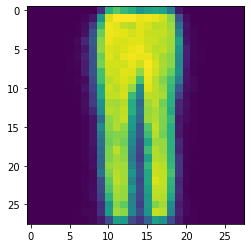

In [11]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

3. visualize the input, noisy input and reconstructed representation(denosed output)of the Denosing_Autoencoder using Matplotlib


In [0]:
#Adding Noies
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [13]:
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3358 - accuracy: 0.5013 - val_loss: 0.3185 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3311 - accuracy: 0.5020 - val_loss: 0.3155 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3279 - accuracy: 0.5025 - val_loss: 0.3113 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3253 - accuracy: 0.5028 - val_loss: 0.3071 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3230 - accuracy: 0.5032 - val_loss: 0.3070 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3213 - accuracy: 0.5034 - val_loss: 0.3035 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [==============

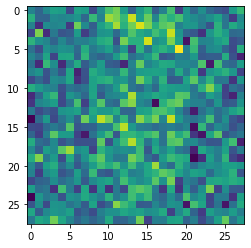

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[2].reshape(28,28))
plt.show()

In [0]:
prediction1 = autoencoder1.predict(x_train_noisy[[2],:])
#prediction1[0]

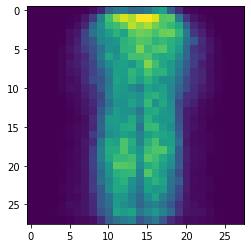

In [16]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

4. plot loss and accuracy using the history object

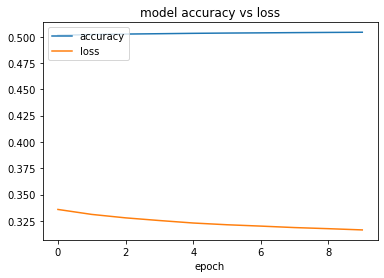

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

train[0:]
(6000,28,28,3)